# Break Even chart
The following code shows how to create a B-E chart by python.

### Import modules

In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
# for plotly runs on Github
import plotly.io as pio
pio.renderers.default = "svg"

### Set variables and B-E formula
Get all elements ready before plot the chart.

In [2]:
# Price of goods ($)
a = 15
# Cost of goods ($)
b = 9
# Fixed cost ($)
c = 1500

# B-E analysis formula
class BE_analysis: 
    def Total_revenue(x, a):                      # for total revenue
        return a*x
    
    def Fixed_costs(x, c):                        # for fixed costs
        return 0*x+c
    
    def Total_costs(x, b, c):                     # for total costs
        return b*x+c
    
    def BE_point(a, b, c):                        # solve the BE point
        return (c/(a-b), a*c/(a-b))

### Parameters for the plot
Prepare for XY settings and also some customized elements.

In [3]:
x_sale = np.arange(0, 401, 1)                     # X ranage for sales
x_loss = np.arange(0, c/(a-b)+1, 1)               # X range for Loss area
x_profit = np.arange(c/(a-b), x_sale[-1]+1, 1)    # X range for Profit area
x_loss_rev = x_loss[::-1]                         # Reverse x_loss for color filling
x_profit_rev = x_profit[::-1]                     # Reverse x_profit for color filling

### Plot the chart
Create a figure for basic chart

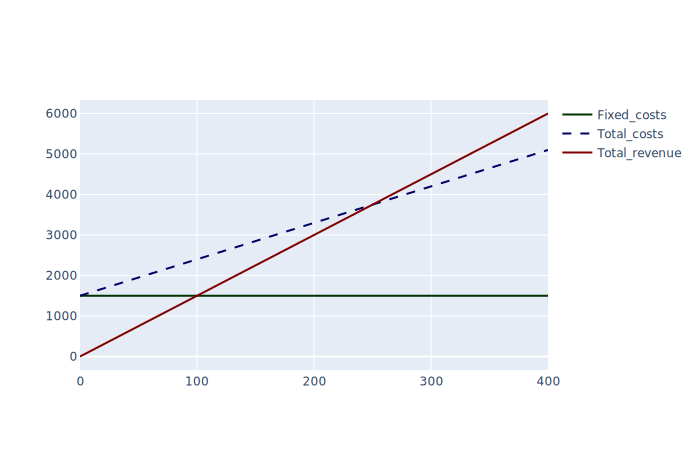

In [4]:
fig = go.Figure()                                 # Create a go.Figure
fig.add_trace(                                    # Draw the line of fixed-costs formula
    go.Scatter(
        name = "Fixed_costs",
        x = x_sale,
        y = BE_analysis.Fixed_costs(x_sale, c),
        line = dict(color="rgb(0, 0, 102)", width=2),
        mode = 'lines',
        line_color = "rgb(0, 51, 0)"
    ))

fig.add_trace(                                    # Draw the line of total-costs formula
    go.Scatter(
        name = "Total_costs",
        x = x_sale,
        y = BE_analysis.Total_costs(x_sale, b, c),
        line = dict(color="rgb(0, 0, 102)", width=2, dash='dash'),
        mode = 'lines',
    ))

fig.add_trace(                                    # Draw the line of total-revenue formula
    go.Scatter(
        name = "Total_revenue",
        x = x_sale,
        y = BE_analysis.Total_revenue(x_sale, a),
        line = dict(color="rgb(0, 0, 102)", width=2),
        mode = 'lines',
        line_color = "rgb(128, 0, 0)"
    ))

### B-E point and Loss/Profit area
Draw the B-E point and fill areas of Loss and Profit.

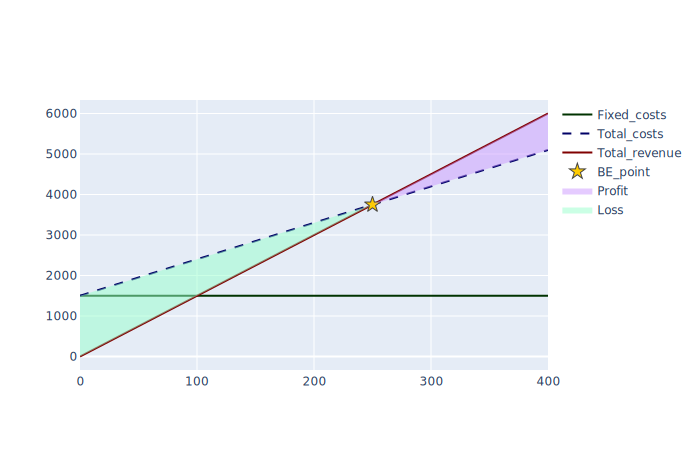

In [5]:
c_x, c_y = BE_analysis.BE_point(a, b, c)          # Calculate the B-E point
fig.add_trace(                                    # Plot the B-E point
    go.Scatter(
        name='BE_point',
        x=[c_x],
        y=[c_y],
        line_color='rgba(255, 204, 0, 1)',
        mode = 'markers', 
        marker = dict(size=12, line=dict(width=1), symbol="star")
    ))

fig.add_trace(                                    # Fill the Profit area
    go.Scatter(
        name='Profit',
        x=list(x_profit)+list(x_profit_rev),
        y=list(BE_analysis.Total_revenue(x_profit, a))+list(BE_analysis.Total_costs(x_profit_rev, b, c)),
        fill='toself',
        fillcolor='rgba(204, 153, 255, 0.5)',
        line_color='rgba(255,255,255,0)'
    ))

fig.add_trace(                                    # Fll the Loss area
    go.Scatter(
        name='Loss',
        x=list(x_loss)+list(x_loss_rev),
        y=list(BE_analysis.Total_revenue(x_loss, a))+list(BE_analysis.Total_costs(x_loss_rev, b, c)),
        fill='toself',
        fillcolor='rgba(153, 255, 204,0.5)',
        line_color='rgba(255,255,255,0)'
    ))

### Customize the chart
Set the XY axes and annotations for a perfect chart.

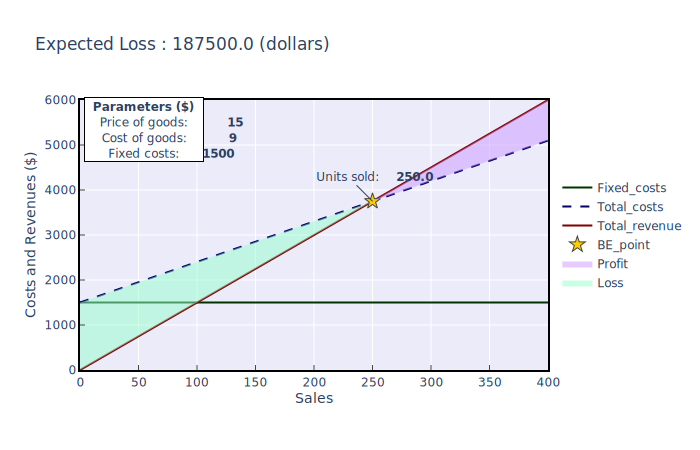

In [6]:
fig.update_xaxes(                                 # X axis settings
    title=dict(text="Sales", standoff=0),
    range=[0, x_sale[-1]],
    tick0=0, dtick=50,
    ticks="inside",
    showline=True,
    linecolor="rgb(0, 0, 0)",
    linewidth=2,
    mirror=True
)

fig.update_yaxes(                                 # Y axis settings
    title=dict(text="Costs and Revenues ($)", standoff=0),
    range=[0, BE_analysis.Total_revenue(x_sale, a)[-1]],
    ticks="inside",
    showline=True,
    linecolor="rgb(0, 0, 0)",
    linewidth=2,
    mirror=True
)

ann = [                                           # Annotations
    {
        'x': c_x, 'y': c_y, 
        'xref': 'x', 'yref': 'y', 
        'text': 'Units sold: <b>'+str(c/(a-b))+'</b>',
        'showarrow': True, 
        'arrowhead': 0, 
        'ax': -25, 'ay': -25
    },
    {
        'x': 55, 'y': 5350, 
        'xref': 'x', 'yref': 'y', 
        'text': F'<b>Parameters ($)</b><br>Price of goods: <b>{a}</b> <br>Cost of goods: <b>{b}</b> <br>Fixed costs: <b>{c}</b>',
        'showarrow': False, 
        'arrowhead': 0, 
        'ax': 0, 'ay': 0,
        'bgcolor': 'rgb(255, 255, 255)',
        'bordercolor': 'rgb(0, 0, 0)',
        'startstandoff': 0
    }
]

fig.update_layout(                                # Final adjustment for the figure layout
    title='Expected Loss : '+str(c*c/(a-b)*0.5)+' (dollars)',      # Show the expected loss by the B-E point
    annotations=ann,
    legend=dict(y=0.5),
    plot_bgcolor="rgb(235, 235, 250)"
)